In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/^TWII.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-30,11933.230469,11933.230469,11418.219727,11421.740234,11421.740234,4917300
1,2020-01-31,11494.030273,11594.209961,11436.950195,11495.099609,11495.099609,3130700
2,2020-02-03,11365.900391,11365.900391,11138.030273,11354.919922,11354.919922,3472200
3,2020-02-04,11399.459961,11581.360352,11393.030273,11555.919922,11555.919922,2731100
4,2020-02-05,11601.549805,11620.419922,11512.709961,11573.620117,11573.620117,2624400


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
480,2022-01-10,18095.390625,18243.259766,18043.970703,18239.380859,18239.380859,3440300
481,2022-01-11,18266.539063,18293.529297,18135.429688,18288.210938,18288.210938,4694000
482,2022-01-12,18348.390625,18394.699219,18255.380859,18375.400391,18375.400391,4196200
483,2022-01-13,18356.210938,18459.730469,18346.810547,18436.929688,18436.929688,4599500
484,2022-01-14,18509.000000,18509.000000,18213.439453,18403.330078,18403.330078,4559700


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,485.000000,485.000000,485.000000,485.000000,485.000000,4.850000e+02
mean,14643.294934,14728.305376,14550.929216,14642.282231,14642.282231,4.902989e+06
std,2675.208360,2681.138253,2666.857736,2675.757807,2675.757807,2.042529e+06
min,8816.860352,9029.519531,8523.629883,8681.339844,8681.339844,1.365000e+05
25%,12423.019531,12486.950195,12266.549805,12397.549805,12397.549805,3.475900e+06
50%,15549.530273,15676.450195,15367.450195,15557.299805,15557.299805,4.451500e+06
75%,17192.910156,17278.550781,17075.550781,17181.439453,17181.439453,5.900400e+06
max,18598.130859,18619.609375,18446.519531,18526.349609,18526.349609,1.499950e+07


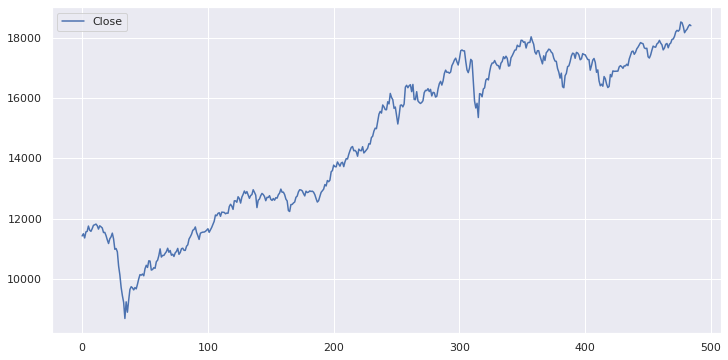

In [6]:
df[['Close']].plot(figsize=(12,6));


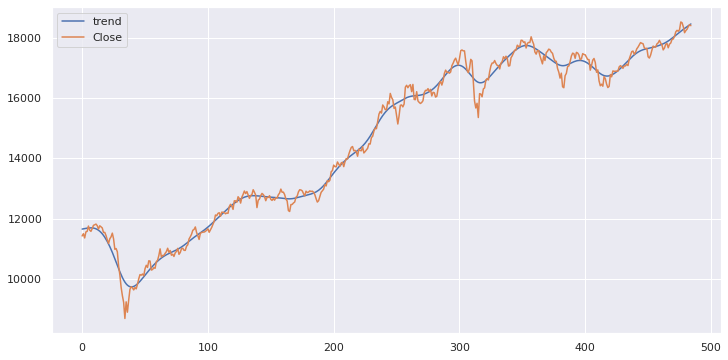

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-0.46064951237270113,
 0.8994694454052072,
 0,
 484,
 {'1%': -3.4439333076538854,
  '5%': -2.8675301216074414,
  '10%': -2.56996050355167},
 6070.542162717348)

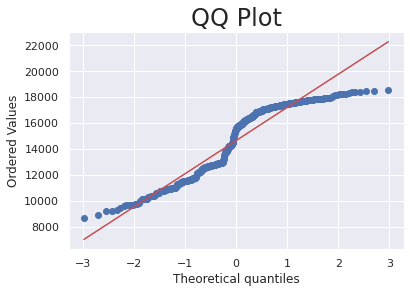

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


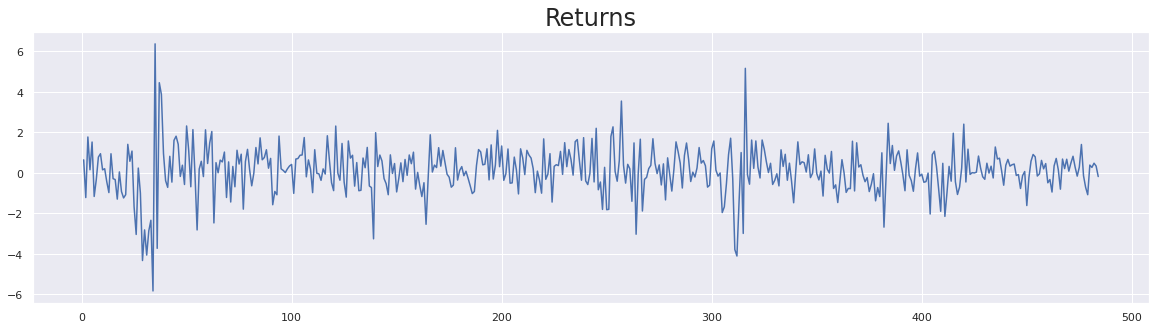

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


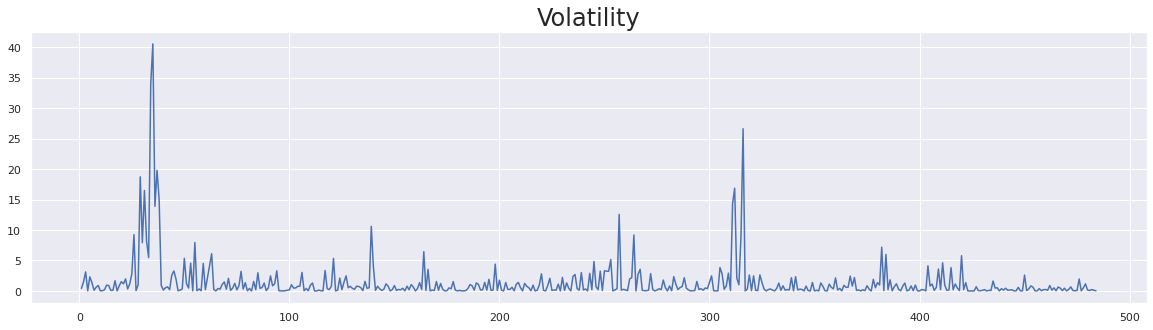

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

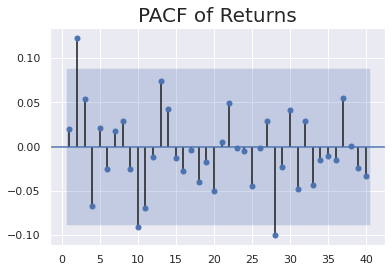

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

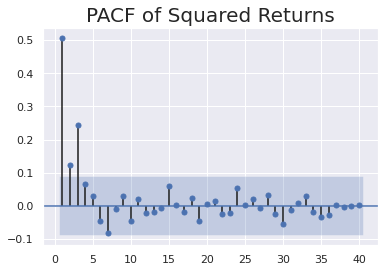

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 15.4 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 234776428650.93353
Iteration:      2,   Func. Count:     12,   Neg. LLF: 246896301.76974344
Iteration:      3,   Func. Count:     17,   Neg. LLF: 759.433514409395
Iteration:      4,   Func. Count:     23,   Neg. LLF: 721.6601473146841
Iteration:      5,   Func. Count:     28,   Neg. LLF: 721.4594621611323
Iteration:      6,   Func. Count:     32,   Neg. LLF: 721.4594611796908
Optimization terminated successfully    (Exit mode 0)
            Current function value: 721.4594611796908
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -721.459
Distribution:                  Normal   AIC:                           1448.92
Method:            Maximum Likelihood   BIC:                           1461.47
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:20   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1744  4.785e-02      3.645  2.671e-04 [8.065e-02,  0.268]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.8549  8.933e-02      9.570  1.069e-21 [  0.680,  1.030]
alpha[1]       0.3342  9.364e-02      3.569  3.589e-04 [  0.151,  0.518]
========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 713.3834740320176
Optimization terminated successfully    (Exit mode 0)
            Current function value: 713.3834594787138
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -713.383
Distribution:                  Normal   AIC:                           1434.77
Method:            Maximum Likelihood   BIC:                           1451.50
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1921  4.694e-02      4.093  4.258e-05 [  0.100,  0.284]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.6815  8.726e-02      7.810  5.712e-15   [  0.510,  0.853]
alpha[1]       0.2558  9.626e-02      2.658  7.862e-03 [6.718e-02,  0.444]
alpha[2]       0.2208  9.290e-02      2.377  1.745e-02 [3.875e-02,  0.403]
==========================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 714.0409874001643
Optimization terminated successfully    (Exit mode 0)
            Current function value: 706.5049043677925
            Iterations: 8
            Function evaluations: 59
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -706.505
Distribution:                  Normal   AIC:                           1423.01
Method:            Maximum Likelihood   BIC:                           1443.92
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:20   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1745  4.537e-02      3.846  1.200e-04 [8.558e-02,  0.263]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5994  8.490e-02      7.060  1.670e-12    [  0.433,  0.766]
alpha[1]       0.1627  6.954e-02      2.339  1.933e-02  [2.636e-02,  0.299]
alpha[2]       0.1986  8.208e-02      2.419  1.556e-02  [3.769e-02,  0.359]
alpha[3]       0.1566  8.083e-02      1.937  5.274e-02 [-1.852e-03,  0.315]
===========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     88,   Neg. LLF: 1033.5654638433039
Iteration:     10,   Func. Count:    172,   Neg. LLF: 706.4530078596811
Iteration:     15,   Func. Count:    258,   Neg. LLF: 696.7369591562501
Iteration:     20,   Func. Count:    341,   Neg. LLF: 696.0022749847476
Optimization terminated successfully    (Exit mode 0)
            Current function value: 696.0022749847476
            Iterations: 21
            Function evaluations: 356
            Gradient evaluations: 21


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -696.002
Distribution:                  Normal   AIC:                           1422.00
Method:            Maximum Likelihood   BIC:                           1484.74
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:21   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1388  8.040e-02      1.726  8.439e-02 [-1.883e-02,  0.296]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3091      0.106      2.917  3.536e-03    [  0.101,  0.517]
alpha[1]       0.0594  7.050e-02      0.843      0.399 [-7.877e-02,  0.198]
alpha[2]       0.1430      0.169      0.846      0.397    [ -0.188,  0.474]
alpha[3]       0.1741      0.132      1.315      0.188 [-8.533e-02,  0.434]
alpha[4]       0.1354  8.369e-02      1.618      0.106 [-2.862e-02,  0.299]
alpha[5]       0.0808  9.314e-02      0.868      0.386    [ -0.102,  0.263]
alpha[6]       0.1445      0.152      0.950      0.342    [ -0.154,  0.443]
alpha[7]       0.0408      0.123      0.331      0.741    [ -0.201,  0.283]
alpha[8]       0.0104      0.149  6.975e-02      0.944    [ -0.282,  0.303]
alpha[9]   9.9029e-12      0.189  5.245e-11      1.000    [ -0.370,  0.370]
alpha[10]  1.2841e-11      0.287  4.482e-11      1.000    [ -0.562,  0.562]
alpha[11]      0.0000  9.759e-02      0.000      1.000    [ -0.191,  0.191]
alpha[12]      0.0000      0.146      0.000      1.000    [ -0.286,  0.286]
alpha[13]  1.7152e-11      0.113  1.521e-10      1.000    [ -0.221,  0.221]
===========================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 701.316208167873
Optimization terminated successfully    (Exit mode 0)
            Current function value: 701.294889798751
            Iterations: 7
            Function evaluations: 45
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -701.295
Distribution:                  Normal   AIC:                           1410.59
Method:            Maximum Likelihood   BIC:                           1427.32
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:21   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1597  4.125e-02      3.871  1.085e-04 [7.883e-02,  0.241]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1150  4.077e-02      2.821  4.790e-03 [3.510e-02,  0.195]
alpha[1]       0.1938  4.218e-02      4.595  4.332e-06   [  0.111,  0.276]
beta[1]        0.7143  4.904e-02     14.567  4.554e-48   [  0.618,  0.810]
==========================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 702.0423078150332
Iteration:     10,   Func. Count:     69,   Neg. LLF: 701.2949099333283
Optimization terminated successfully    (Exit mode 0)
            Current function value: 701.29488977559
            Iterations: 12
            Function evaluations: 80
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -701.295
Distribution:                  Normal   AIC:                           1412.59
Method:            Maximum Likelihood   BIC:                           1433.50
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:21   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1597  4.429e-02      3.606  3.115e-04 [7.288e-02,  0.246]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.1150      0.168      0.683      0.494 [ -0.215,  0.445]
alpha[1]       0.1938      0.230      0.843      0.400 [ -0.257,  0.645]
beta[1]        0.7143      2.140      0.334      0.739 [ -3.480,  4.909]
beta[2]        0.0000      1.782      0.000      1.000 [ -3.492,  3.492]
========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 701.3941004251742
Iteration:     10,   Func. Count:     81,   Neg. LLF: 701.2948897368007
Optimization terminated successfully    (Exit mode 0)
            Current function value: 701.2948897368007
            Iterations: 11
            Function evaluations: 87
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -701.295
Distribution:                  Normal   AIC:                           1414.59
Method:            Maximum Likelihood   BIC:                           1439.68
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:21   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1597  4.233e-02      3.773  1.616e-04 [7.673e-02,  0.243]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1150  7.753e-02      1.484      0.138 [-3.693e-02,  0.267]
alpha[1]       0.1938      0.113      1.717  8.596e-02 [-2.741e-02,  0.415]
beta[1]        0.7143      0.804      0.888      0.374    [ -0.862,  2.290]
beta[2]    1.1181e-14      0.625  1.788e-14      1.000    [ -1.226,  1.226]
beta[3]        0.0000      0.324      0.000      1.000    [ -0.635,  0.635]
===========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 717.0830910839361
Optimization terminated successfully    (Exit mode 0)
            Current function value: 698.8489997826537
            Iterations: 9
            Function evaluations: 64
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -698.849
Distribution:                  Normal   AIC:                           1407.70
Method:            Maximum Likelihood   BIC:                           1428.61
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:21   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1492  4.093e-02      3.645  2.673e-04 [6.898e-02,  0.229]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1295  4.370e-02      2.963  3.048e-03  [4.383e-02,  0.215]
alpha[1]       0.0922  5.893e-02      1.564      0.118 [-2.334e-02,  0.208]
alpha[2]       0.1704  8.106e-02      2.102  3.557e-02  [1.150e-02,  0.329]
beta[1]        0.6414  5.432e-02     11.807  3.586e-32    [  0.535,  0.748]
===========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 708.2286595626224
Iteration:     10,   Func. Count:     83,   Neg. LLF: 698.1052054268914
Optimization terminated successfully    (Exit mode 0)
            Current function value: 698.1051556094833
            Iterations: 13
            Function evaluations: 103
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -698.105
Distribution:                  Normal   AIC:                           1408.21
Method:            Maximum Likelihood   BIC:                           1433.30
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:21   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1420  4.114e-02      3.451  5.577e-04 [6.135e-02,  0.223]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1453  4.920e-02      2.952  3.153e-03  [4.883e-02,  0.242]
alpha[1]       0.0802  5.888e-02      1.362      0.173 [-3.520e-02,  0.196]
alpha[2]       0.1257  7.947e-02      1.581      0.114 [-3.008e-02,  0.281]
alpha[3]       0.1013  8.794e-02      1.152      0.249 [-7.107e-02,  0.274]
beta[1]        0.5867  6.765e-02      8.673  4.206e-18    [  0.454,  0.719]
===========================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 710.2521157277667
Optimization terminated successfully    (Exit mode 0)
            Current function value: 690.2972695526723
            Iterations: 9
            Function evaluations: 69
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -690.297
Distribution:                  Normal   AIC:                           1390.59
Method:            Maximum Likelihood   BIC:                           1411.50
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:22   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1214  4.247e-02      2.858  4.269e-03 [3.812e-02,  0.205]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.0057e-03  1.719e-02      0.175      0.861 [-3.069e-02,3.670e-02]
alpha[1]       0.2801  4.984e-02      5.621  1.899e-08      [  0.182,  0.378]
gamma[1]      -0.1655  4.812e-02     -3.438  5.850e-04   [ -0.260,-7.114e-02]
beta[1]        0.8998  3.563e-02     25.251 1.092e-140      [  0.830,  0.970]
=============================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -693.974
Distribution:                  Normal   AIC:                           1397.95
Method:            Maximum Likelihood   BIC:                           1418.86
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:22   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1244  4.350e-02      2.859  4.248e-03 [3.911e-02,  0.210]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1418  7.115e-02      1.993  4.623e-02  [2.373e-03,  0.281]
alpha[1]       0.0333  5.202e-02      0.640      0.522 [-6.867e-02,  0.135]
gamma[1]       0.2605      0.111      2.357  1.845e-02  [4.383e-02,  0.477]
beta[1]        0.7120  8.053e-02      8.842  9.415e-19    [  0.554,  0.870]
===========================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 693.5730295971562
Iteration:     10,   Func. Count:     77,   Neg. LLF: 689.2363413179171
Optimization terminated successfully    (Exit mode 0)
            Current function value: 689.2363407479405
            Iterations: 11
            Function evaluations: 83
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -689.236
Distribution:                  Normal   AIC:                           1388.47
Method:            Maximum Likelihood   BIC:                           1409.38
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:22   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1204  4.247e-02      2.834  4.593e-03 [3.713e-02,  0.204]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1134  5.568e-02      2.037  4.168e-02  [4.271e-03,  0.223]
alpha[1]       0.0547  3.820e-02      1.431      0.152 [-2.021e-02,  0.130]
gamma[1]       0.1989  6.621e-02      3.005  2.659e-03  [6.917e-02,  0.329]
beta[1]        0.7703  6.379e-02     12.076  1.414e-33    [  0.645,  0.895]
===========================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 702.6134217531464
Iteration:     10,   Func. Count:     70,   Neg. LLF: 701.6171371572102
Optimization terminated successfully    (Exit mode 0)
            Current function value: 701.6171346496801
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -701.617
Distribution:                  Normal   AIC:                           1413.23
Method:            Maximum Likelihood   BIC:                           1434.14
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:22   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1521  4.212e-02      3.610  3.060e-04 [6.951e-02,  0.235]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0414  7.401e-02      0.560      0.576   [ -0.104,  0.186]
phi        2.6493e-13      0.254  1.043e-12      1.000   [ -0.498,  0.498]
d              0.6405      0.323      1.980  4.769e-02 [6.511e-03,  1.275]
beta           0.5046      0.136      3.700  2.152e-04   [  0.237,  0.772]
==========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 902.7674307609473
Iteration:     10,   Func. Count:     58,   Neg. LLF: 721.5259073639113
Optimization terminated successfully    (Exit mode 0)
            Current function value: 721.4594613880963
            Iterations: 14
            Function evaluations: 73
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -721.459
Distribution:                  Normal   AIC:                           1448.92
Method:            Maximum Likelihood   BIC:                           1461.47
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:22   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1745  4.785e-02      3.646  2.665e-04 [8.068e-02,  0.268]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.8549  8.933e-02      9.570  1.069e-21 [  0.680,  1.030]
alpha[1]       0.3342  9.365e-02      3.569  3.590e-04 [  0.151,  0.518]
========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 1283.605293232213
Iteration:     10,   Func. Count:     86,   Neg. LLF: 688.5303728848675
Iteration:     15,   Func. Count:    126,   Neg. LLF: 694.7647176623918
Iteration:     20,   Func. Count:    181,   Neg. LLF: 1037.0269081922193
Iteration:     25,   Func. Count:    249,   Neg. LLF: 717.3891834925948
Iteration:     30,   Func. Count:    291,   Neg. LLF: 688.486115589565
Iteration:     35,   Func. Count:    337,   Neg. LLF: 1774.6504559698014
Iteration:     40,   Func. Count:    400,   Neg. LLF: 719.705257871575
Iteration:     45,   Func. Count:    448,   Neg. LLF: 688.4750550427633
Optimization terminated successfully    (Exit mode 0)
            Current function value: 688.4750155455099
            Iterations: 49
            Function evaluations: 463
            Gradient evaluations: 47


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -688.475
Distribution:                  Normal   AIC:                           1388.95
Method:            Maximum Likelihood   BIC:                           1414.04
                                        No. Observations:                  484
Date:                Thu, Jan 26 2023   Df Residuals:                      483
Time:                        02:21:23   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1157  8.611e-05   1343.458      0.000 [  0.116,  0.116]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1050  4.886e-02      2.148  3.170e-02  [9.195e-03,  0.201]
alpha[1]       0.1482  2.786e-02      5.321  1.034e-07  [9.362e-02,  0.203]
gamma[1]       0.6974      0.158      4.410  1.034e-05    [  0.387,  1.007]
beta[1]        0.7864  5.572e-02     14.114  3.102e-45    [  0.677,  0.896]
delta          0.5398      0.312      1.732  8.327e-02 [-7.104e-02,  1.151]
===========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=44.8126696544286, pvalue=1.8580281757607509e-10)

In [46]:
jarque_bera_test.statistic

44.8126696544286

In [47]:
jarque_bera_test.pvalue

1.8580281757607509e-10

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1      0.642278
2     -1.219473
3      1.770158
4      0.153170
5      1.521214
         ...   
480    0.383170
481    0.267718
482    0.476752
483    0.334846
484   -0.182241
Name: returns, Length: 484, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=406.3979931038511, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

406.3979931038511

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

4.523558255870608

coef. asimetria

In [53]:
returns.skew()

-0.23492558497177135

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -21.566
P-value                         0.000
Lags                               18
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -8.052
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -2.61 (1%), -1.99 (5%), -1.67 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -10.403
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.069
P-value                         0.758
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        485 non-null    object 
 1   Open        485 non-null    float64
 2   High        485 non-null    float64
 3   Low         485 non-null    float64
 4   Close       485 non-null    float64
 5   Adj Close   485 non-null    float64
 6   Volume      485 non-null    int64  
 7   trend       485 non-null    float64
 8   returns     484 non-null    float64
 9   sq_returns  484 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 38.0+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/^TWII.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-30,11933.230469,11933.230469,11418.219727,11421.740234,11421.740234,4917300
1,2020-01-31,11494.030273,11594.209961,11436.950195,11495.099609,11495.099609,3130700
2,2020-02-03,11365.900391,11365.900391,11138.030273,11354.919922,11354.919922,3472200
3,2020-02-04,11399.459961,11581.360352,11393.030273,11555.919922,11555.919922,2731100
4,2020-02-05,11601.549805,11620.419922,11512.709961,11573.620117,11573.620117,2624400
...,...,...,...,...,...,...,...
480,2022-01-10,18095.390625,18243.259766,18043.970703,18239.380859,18239.380859,3440300
481,2022-01-11,18266.539063,18293.529297,18135.429688,18288.210938,18288.210938,4694000
482,2022-01-12,18348.390625,18394.699219,18255.380859,18375.400391,18375.400391,4196200
483,2022-01-13,18356.210938,18459.730469,18346.810547,18436.929688,18436.929688,4599500


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2020-01-30,11421.740234,4917300
1,2020-01-31,11495.099609,3130700
2,2020-02-03,11354.919922,3472200
3,2020-02-04,11555.919922,2731100
4,2020-02-05,11573.620117,2624400
...,...,...,...
480,2022-01-10,18239.380859,3440300
481,2022-01-11,18288.210938,4694000
482,2022-01-12,18375.400391,4196200
483,2022-01-13,18436.929688,4599500


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-30,11421.740234,4917300,11495.099609
1,2020-01-31,11495.099609,3130700,11354.919922
2,2020-02-03,11354.919922,3472200,11555.919922
3,2020-02-04,11555.919922,2731100,11573.620117
4,2020-02-05,11573.620117,2624400,11749.679688
...,...,...,...,...
480,2022-01-10,18239.380859,3440300,18288.210938
481,2022-01-11,18288.210938,4694000,18375.400391
482,2022-01-12,18375.400391,4196200,18436.929688
483,2022-01-13,18436.929688,4599500,18403.330078


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-30,11421.740234,4917300,11495.099609
1,2020-01-31,11495.099609,3130700,11354.919922
2,2020-02-03,11354.919922,3472200,11555.919922
3,2020-02-04,11555.919922,2731100,11573.620117
4,2020-02-05,11573.620117,2624400,11749.679688
...,...,...,...,...
479,2022-01-07,18169.759766,4727900,18239.380859
480,2022-01-10,18239.380859,3440300,18288.210938
481,2022-01-11,18288.210938,4694000,18375.400391
482,2022-01-12,18375.400391,4196200,18436.929688


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.27835426, 0.32165781, 0.28580569],
       [0.28580569, 0.20145327, 0.27156703],
       [0.27156703, 0.22442979, 0.29198347],
       ...,
       [0.97581123, 0.30663392, 0.98466744],
       [0.98466744, 0.27314136, 0.99091723],
       [0.99091723, 0.30027585, 0.98750438]])

In [73]:
price_volume_target_scaled_df.shape

(484, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((484, 2), (484, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((314, 2), (314, 1))

In [78]:
X_test.shape, y_test.shape

((170, 2), (170, 1))

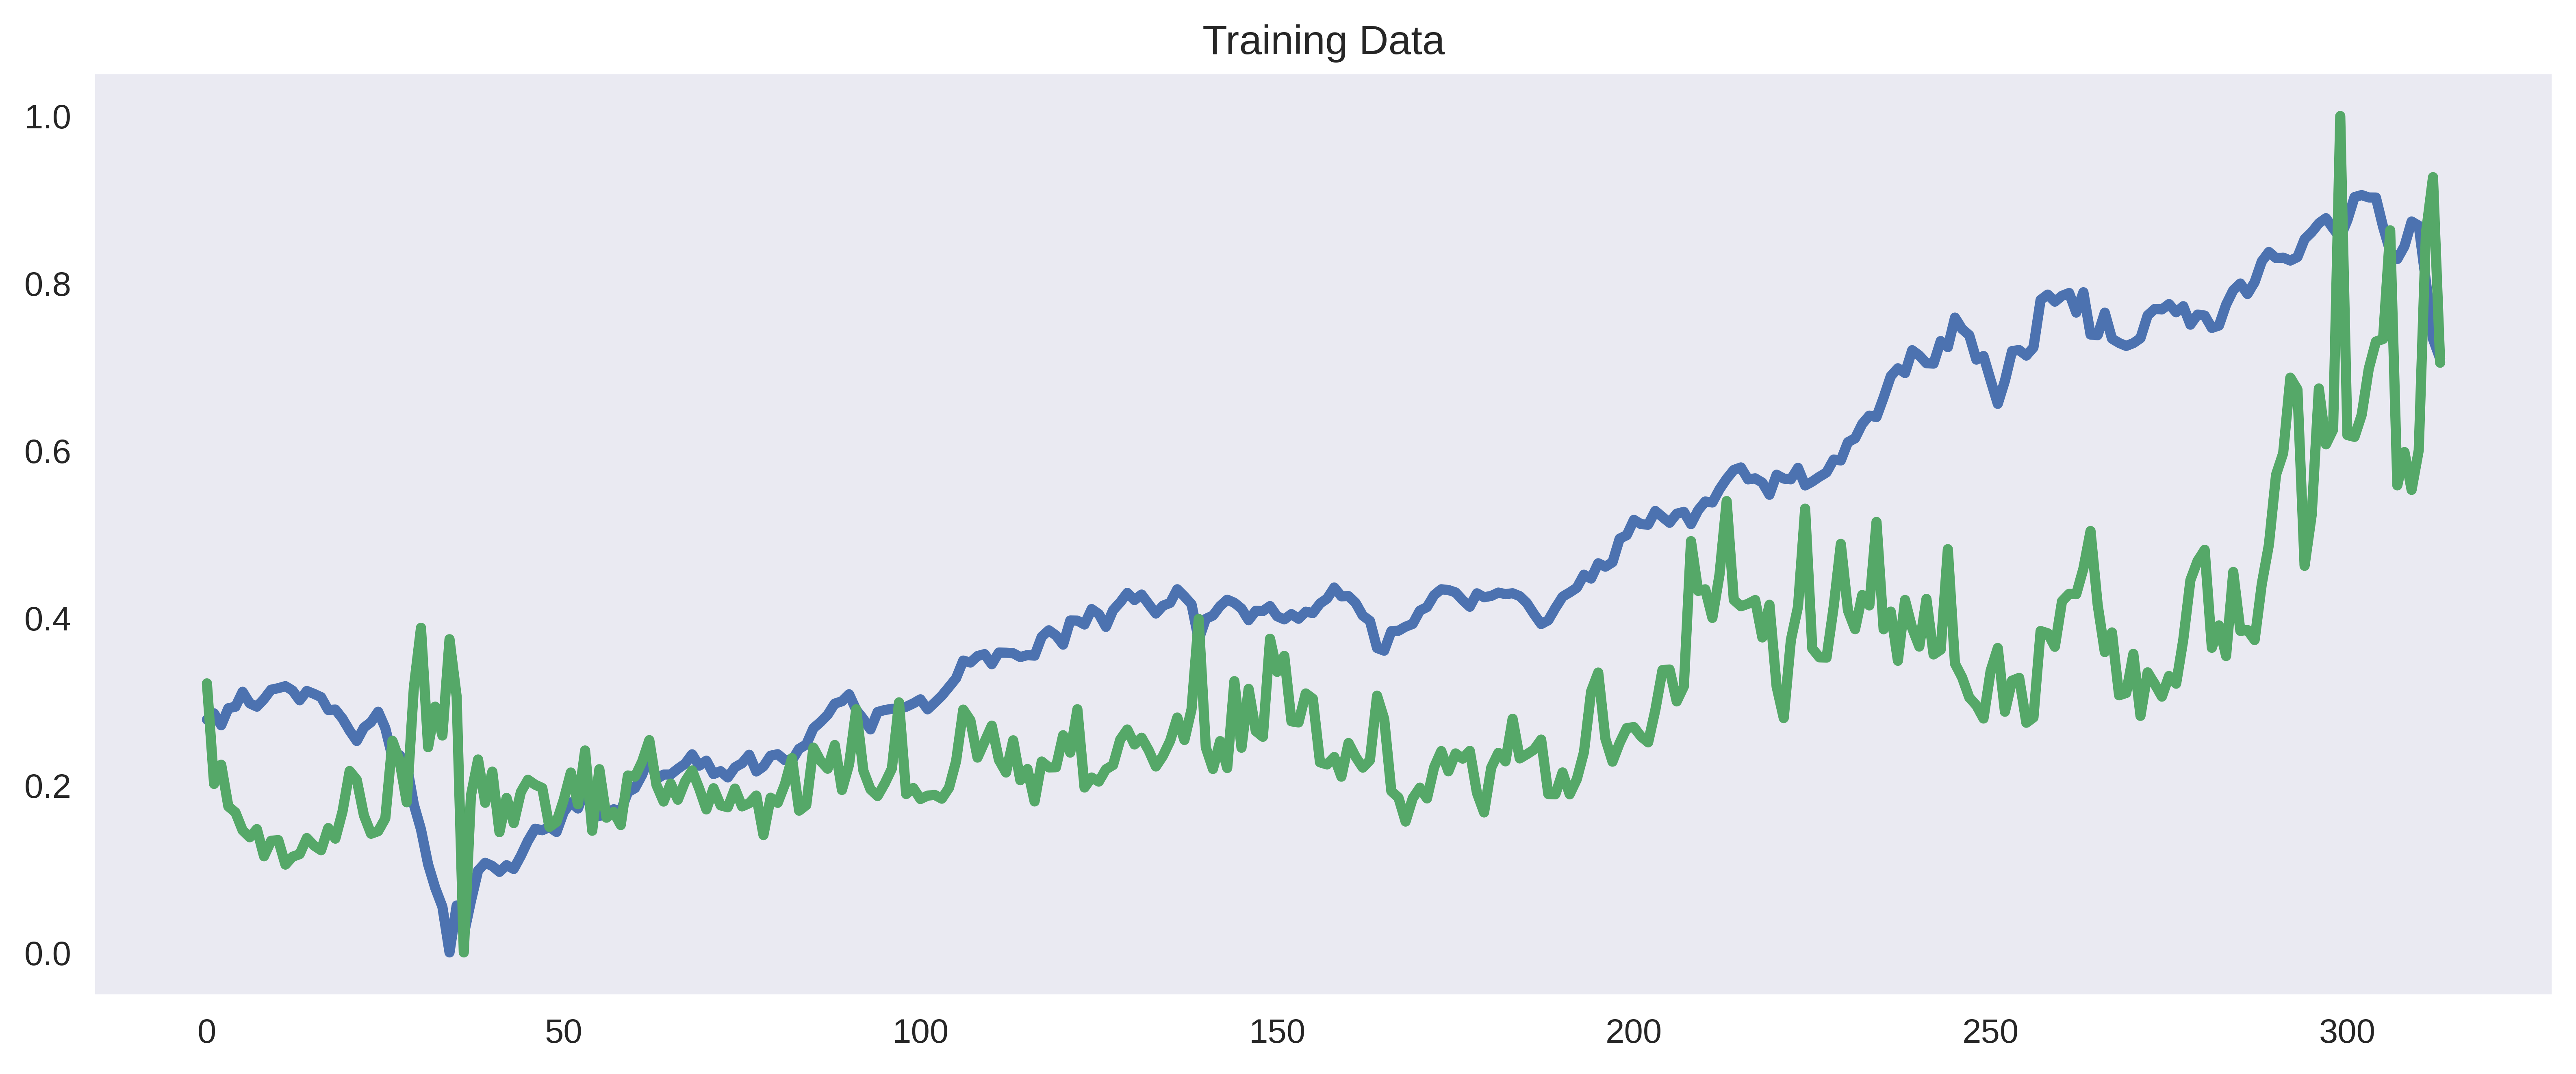

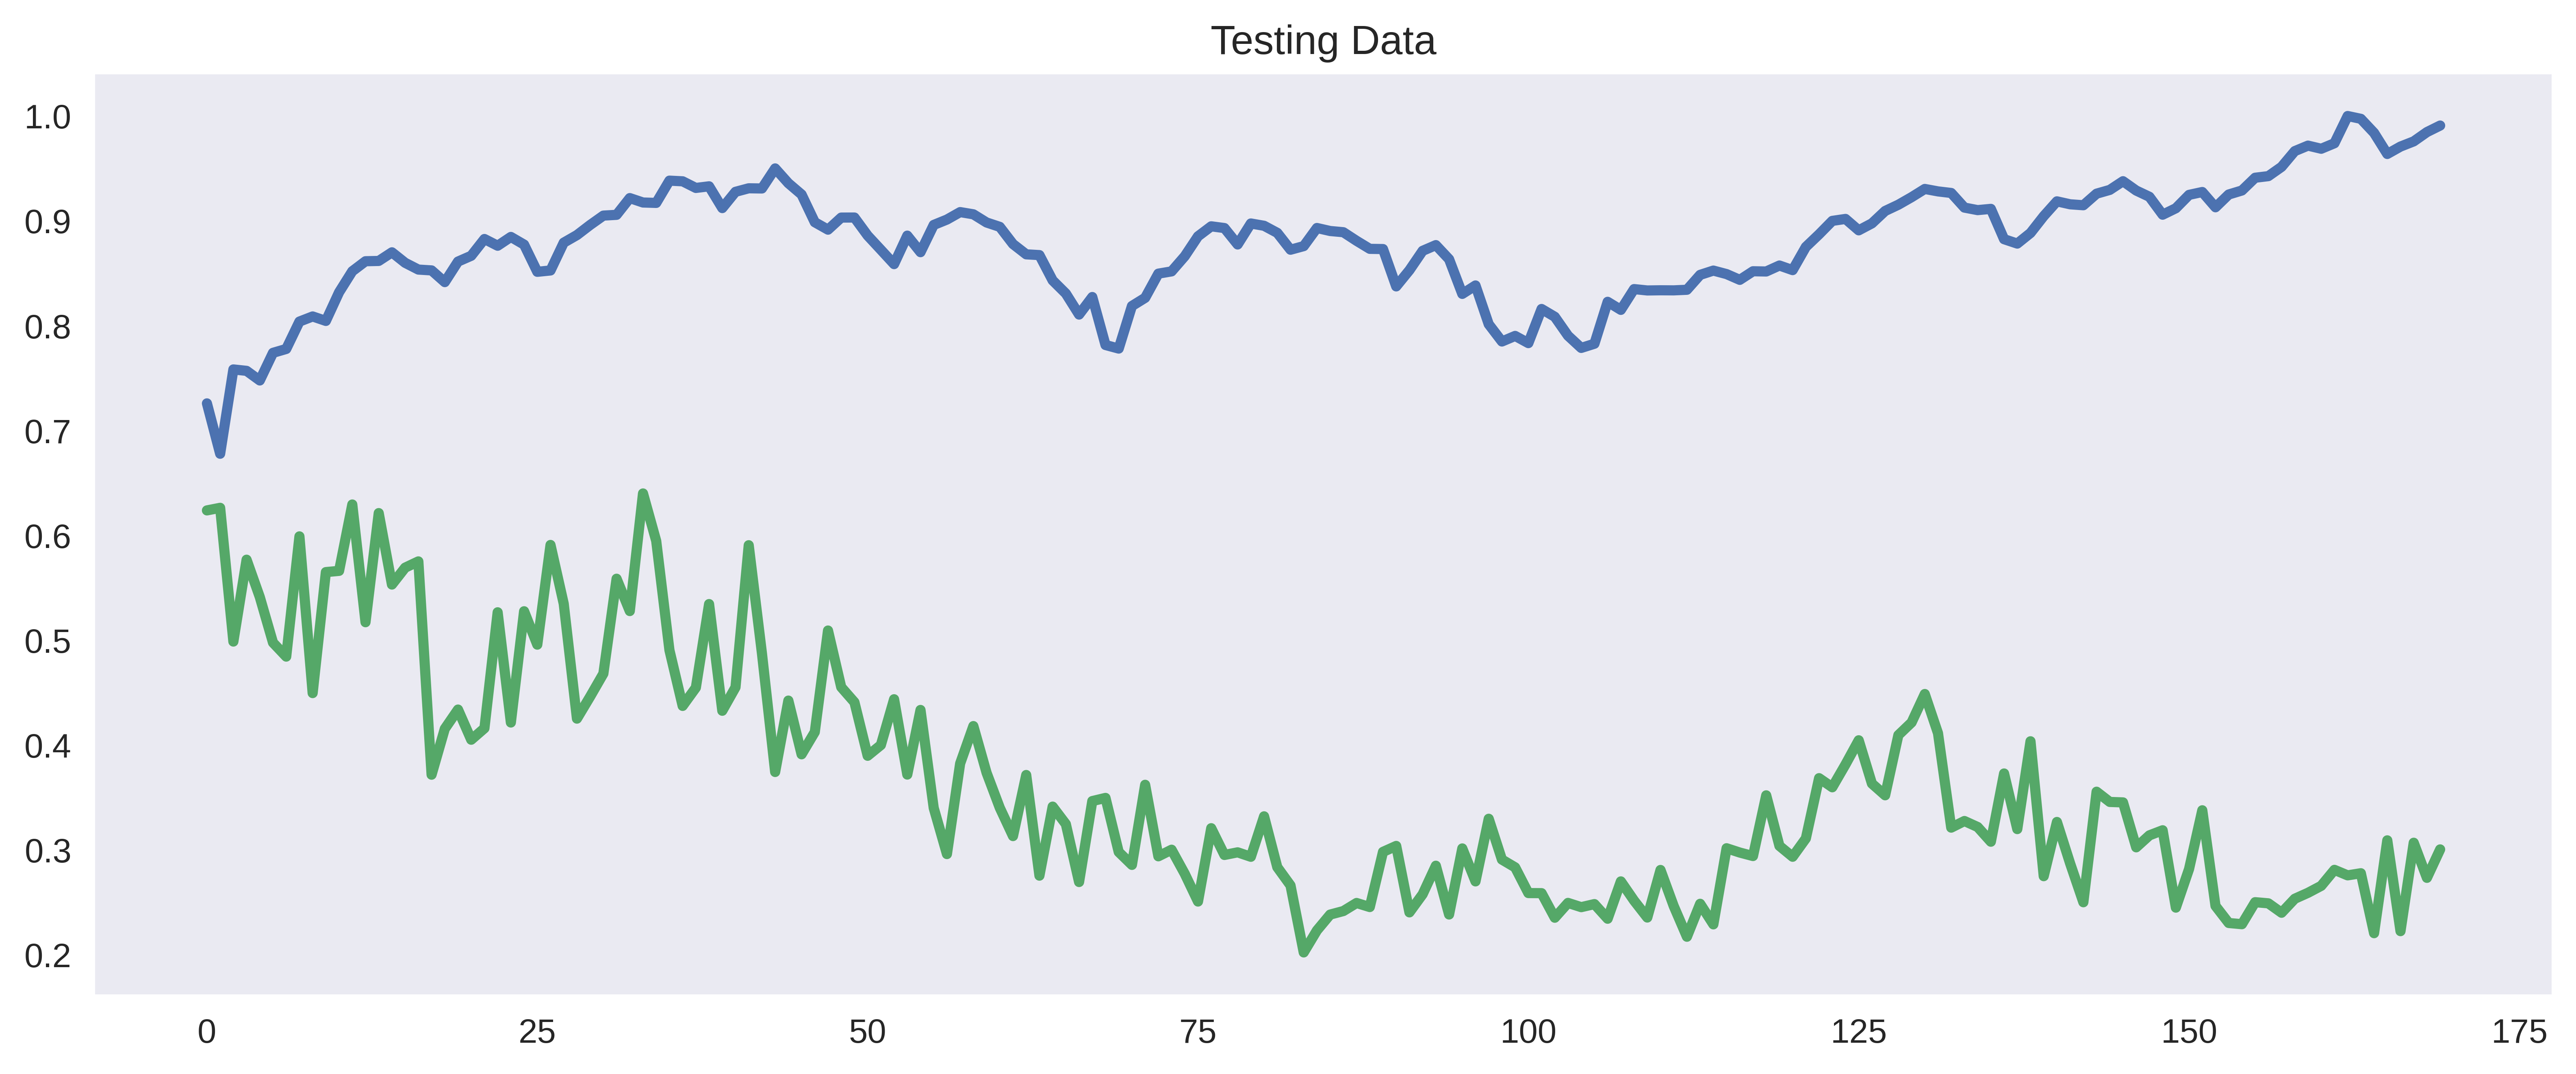

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.30671858469093094


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.3022943 ],
       [0.29611136],
       [0.28592503],
       [0.2987305 ],
       [0.29956143],
       [0.31314204],
       [0.29992992],
       [0.29748169],
       [0.30213102],
       [0.31402671],
       [0.31569696],
       [0.31473532],
       [0.31103562],
       [0.30104037],
       [0.31299075],
       [0.30899282],
       [0.30490971],
       [0.29408395],
       [0.29321574],
       [0.2870576 ],
       [0.27947143],
       [0.26738336],
       [0.27703003],
       [0.28051232],
       [0.29187552],
       [0.27611221],
       [0.25497269],
       [0.25477671],
       [0.23958875],
       [0.21171213],
       [0.19287378],
       [0.14062967],
       [0.12072556],
       [0.09714046],
       [0.06097748],
       [0.10348807],
       [0.03992525],
       [0.09550852],
       [0.13248733],
       [0.13522864],
       [0.13582191],
       [0.12185939],
       [0.1333007 ],
       [0.12609265],
       [0.14402612],
       [0.16159318],
       [0.1736759 ],
       [0.171

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

484

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-30
1,2020-01-31
2,2020-02-03
3,2020-02-04
4,2020-02-05
...,...
479,2022-01-07
480,2022-01-10
481,2022-01-11
482,2022-01-12


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-30,0.278354
1,2020-01-31,0.285806
2,2020-02-03,0.271567
3,2020-02-04,0.291983
4,2020-02-05,0.293781
...,...,...
479,2022-01-07,0.963780
480,2022-01-10,0.970851
481,2022-01-11,0.975811
482,2022-01-12,0.984667


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-30,0.278354,0.302294
1,2020-01-31,0.285806,0.296111
2,2020-02-03,0.271567,0.285925
3,2020-02-04,0.291983,0.298730
4,2020-02-05,0.293781,0.299561
...,...,...,...
479,2022-01-07,0.963780,0.909009
480,2022-01-10,0.970851,0.906062
481,2022-01-11,0.975811,0.919440
482,2022-01-12,0.984667,0.923732


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2020-01-30,11421.740234,4917300,11495.099609
1,2020-01-31,11495.099609,3130700,11354.919922
2,2020-02-03,11354.919922,3472200,11555.919922
3,2020-02-04,11555.919922,2731100,11573.620117
4,2020-02-05,11573.620117,2624400,11749.679688
...,...,...,...,...
480,2022-01-10,18239.380859,3440300,18288.210938
481,2022-01-11,18288.210938,4694000,18375.400391
482,2022-01-12,18375.400391,4196200,18436.929688
483,2022-01-13,18436.929688,4599500,18403.330078


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-30,11421.740234,4917300,11495.099609
1,2020-01-31,11495.099609,3130700,11354.919922
2,2020-02-03,11354.919922,3472200,11555.919922
3,2020-02-04,11555.919922,2731100,11573.620117
4,2020-02-05,11573.620117,2624400,11749.679688
...,...,...,...,...
480,2022-01-10,18239.380859,3440300,18288.210938
481,2022-01-11,18288.210938,4694000,18375.400391
482,2022-01-12,18375.400391,4196200,18436.929688
483,2022-01-13,18436.929688,4599500,18403.330078


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.14217402e+04, 4.91730000e+06],
       [1.14950996e+04, 3.13070000e+06],
       [1.13549199e+04, 3.47220000e+06],
       [1.15559199e+04, 2.73110000e+06],
       [1.15736201e+04, 2.62440000e+06],
       [1.17496797e+04, 2.30540000e+06],
       [1.16128096e+04, 2.18270000e+06],
       [1.15740703e+04, 2.32830000e+06],
       [1.16640400e+04, 1.84540000e+06],
       [1.17741904e+04, 2.12050000e+06],
       [1.17917803e+04, 2.13240000e+06],
       [1.18157002e+04, 1.69710000e+06],
       [1.17635098e+04, 1.83720000e+06],
       [1.16489805e+04, 1.88260000e+06],
       [1.17588398e+04, 2.16900000e+06],
       [1.17250898e+04, 2.03540000e+06],
       [1.16863496e+04, 1.95270000e+06],
       [1.15348701e+04, 2.34710000e+06],
       [1.15402305e+04, 2.15840000e+06],
       [1.14336201e+04, 2.64000000e+06],
       [1.12921699e+04, 3.36060000e+06],
       [1.11704600e+04, 3.20410000e+06],
       [1.13277197e+04, 2.57230000e+06],
       [1.13923496e+04, 2.24530000e+06],
       [1.151482

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.27835426]),
 array([0.28580569]),
 array([0.27156703]),
 array([0.29198347]),
 array([0.29378135]),
 array([0.31166448]),
 array([0.29776199]),
 array([0.29382708]),
 array([0.30296569]),
 array([0.31415414]),
 array([0.31594082]),
 array([0.31837047]),
 array([0.31306926]),
 array([0.30143603]),
 array([0.31259492]),
 array([0.30916678]),
 array([0.30523177]),
 array([0.28984535]),
 array([0.29038982]),
 array([0.27956095]),
 array([0.26519324]),
 array([0.25283064]),
 array([0.26880419]),
 array([0.27536893]),
 array([0.2878088]),
 array([0.26820387]),
 array([0.23324505]),
 array([0.23587587]),
 array([0.22472402]),
 array([0.17683888]),
 array([0.14703188]),
 array([0.10527462]),
 array([0.07702278]),
 array([0.05457893]),
 array([0.]),
 array([0.0561452]),
 array([0.02119758]),
 array([0.06137935]),
 array([0.09785771]),
 array([0.10716297]),
 array([0.10335999]),
 array([0.09630156]),
 array([0.10428834]),
 array([0.09977543]),
 array([0.11553065]),
 array([0.13357527])

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((338, 1, 1), (146, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
9/9 [==============================] - 9s 223ms/step - loss: 0.1726 - val_loss: 0.5458
Epoch 2/20
9/9 [==============================] - 0s 25ms/step - loss: 0.1060 - val_loss: 0.2902
Epoch 3/20
9/9 [==============================] - 0s 23ms/step - loss: 0.0333 - val_loss: 0.0236
Epoch 4/20
9/9 [==============================] - 0s 23ms/step - loss: 0.0251 - val_loss: 0.0638
Epoch 5/20
9/9 [==============================] - 0s 24ms/step - loss: 0.0163 - val_loss: 0.0977
Epoch 6/20
9/9 [==============================] - 0s 22ms/step - loss: 0.0154 - val_loss: 0.0530
Epoch 7/20
9/9 [==============================] - 0s 26ms/step - loss: 0.0120 - val_loss: 0.0312
Epoch 8/20
9/9 [==============================] - 0s 25ms/step - loss: 0.0095 - val_loss: 0.0317
Epoch 9/20
9/9 [==============================] - 0s 23ms/step - loss: 0.0065 - val_loss: 0.0122
Epoch 10/20
9/9 [==============================] - 0s 23ms/step - loss: 0.0047 - val_loss: 0.0058
Epoch 11/20
9/9 [===========

In [102]:
# Make prediction
predicted = model.predict(X)

16/16 [==============================] - 2s 6ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.2800741,
 0.28688458,
 0.2738942,
 0.29255158,
 0.29420426,
 0.31072986,
 0.2978692,
 0.29424635,
 0.30267185,
 0.31304297,
 0.31470478,
 0.31696722,
 0.31203458,
 0.3012587,
 0.31159398,
 0.30841234,
 0.3047674,
 0.2905881,
 0.29108787,
 0.28117517,
 0.2681112,
 0.25695068,
 0.271385,
 0.27735314,
 0.28872,
 0.27084032,
 0.23942095,
 0.24176484,
 0.23185211,
 0.18996511,
 0.16444212,
 0.12938832,
 0.106131665,
 0.08791799,
 0.044582173,
 0.08918154,
 0.061253183,
 0.0934123,
 0.12324706,
 0.13095596,
 0.12780054,
 0.121961765,
 0.1285702,
 0.124832496,
 0.1379225,
 0.1530567,
 0.16518414,
 0.163628,
 0.16692328,
 0.16188656,
 0.18214677,
 0.19214925,
 0.18586302,
 0.20536146,
 0.20444702,
 0.17826699,
 0.17994946,
 0.18507865,
 0.1834055,
 0.20272748,
 0.20704651,
 0.22094914,
 0.24073273,
 0.21632956,
 0.22116289,
 0.22119601,
 0.22728306,
 0.23254268,
 0.2426453,
 0.23056719,
 0.23586446,
 0.22172366,
 0.22477162,
 0.21811987,
 0.22885653,
 0.23311733,
 0.24219681,
 0.22443378,
 

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-31
2,2020-02-03
3,2020-02-04
4,2020-02-05
5,2020-02-06
...,...
480,2022-01-10
481,2022-01-11
482,2022-01-12
483,2022-01-13


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2020-01-31,0.280074
2,2020-02-03,0.286885
3,2020-02-04,0.273894
4,2020-02-05,0.292552
5,2020-02-06,0.294204
...,...,...
480,2022-01-10,1.023790
481,2022-01-11,1.032710
482,2022-01-12,1.038982
483,2022-01-13,1.050210


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2020-01-31,0.280074,0.285806
2,2020-02-03,0.286885,0.271567
3,2020-02-04,0.273894,0.291983
4,2020-02-05,0.292552,0.293781
5,2020-02-06,0.294204,0.311664
...,...,...,...
480,2022-01-10,1.023790,0.970851
481,2022-01-11,1.032710,0.975811
482,2022-01-12,1.038982,0.984667
483,2022-01-13,1.050210,0.990917


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")